# EX 2.2

In [ ]:
import time as t
import robot
# Create a robot object and initialize
arlo = robot.Robot()

print("Running ...")

starttime = t.time()
pic = 0

while (pic < 5):
  if (t.time() - starttime > pic):
    pic += 1
    print(arlo.read_front_ping_sensor())
  t.sleep(0.1)

[112 100]


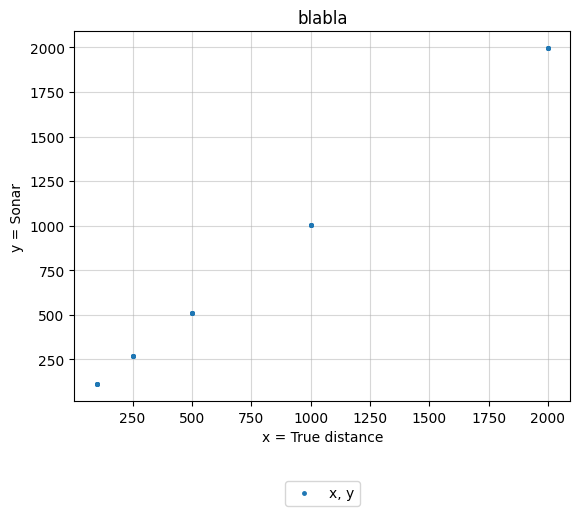

In [24]:
import matplotlib.pyplot as plt
import numpy as np

Wall = np.array([[115, 115, 111, 111, 112, 269, 268, 268, 268, 268, 512, 512, 512, 512, 512, 1003, 1003, 1003, 1003, 1003, 1995, 1994, 1995, 1994, 1995],
                 [100, 100, 100, 100, 100, 250, 250, 250, 250, 250, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 2000, 2000, 2000, 2000, 2000]])

Jacket = np.array([[112, 108, 108, 108, 109, 274, 276, 276, 274, 275, 504, 504, 504, 504, 504, 1001, 997, 997, 998, 997, 2011, 2010, 2009, 2011, 2011],
                   [100, 100, 100, 100, 100, 250, 250, 250, 250, 250, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 2000, 2000, 2000, 2000, 2000]])

x = Wall[1]
y = Wall[0]
print(np.array([112, 100]))

# Initialise figure (fig) and axis (ax)
fig, ax = plt.subplots()#figsize=(8,5))

# Plot in axis, add label to data
dotSize = 5
ax.plot(x, y, '.', markersize=dotSize, label='x, y') 

# Set labels and title
ax.set_xlabel('x = True distance')
ax.set_ylabel('y = Sonar')

ax.set_title(f'blabla')
# Add grid
ax.grid(alpha=0.5)
# Set axes limits
#ax.set_ylim(0,35)
#ax.legend()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.25),
          ncol=1, fancybox=True, shadow=False)
# Show plot
plt.show()
# Add legend (remember to label the data as shown above (*))
# Save plot to some local path
#fig.savefig(f'Reg_plot_lin.png', bbox_inches='tight')

# EX 2.3

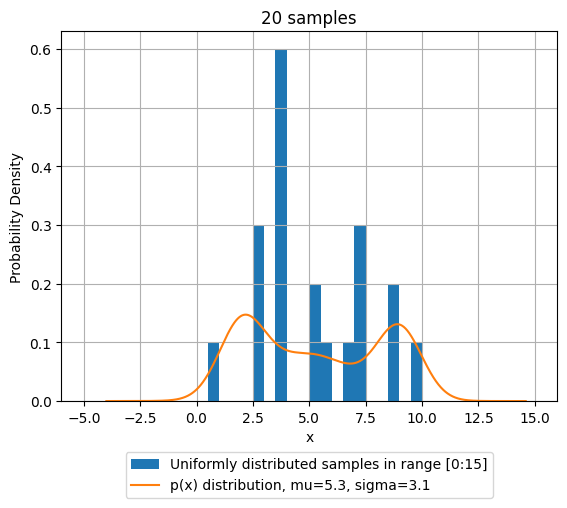

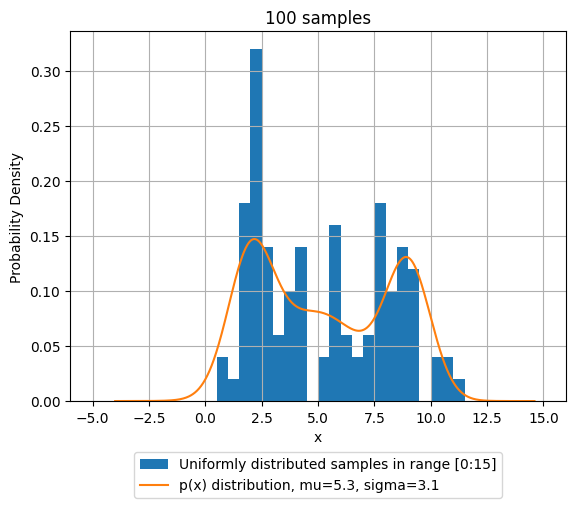

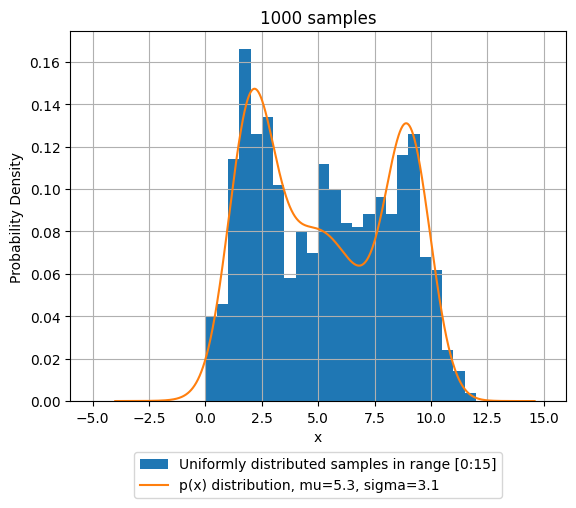

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import random 

for num_samples in (20,100,1000):
    bins = 40
    a = 0
    b = 15
    samples = np.random.uniform(a, b, num_samples)
    w = p(samples)/(1/(b-a))
    pp = random.choices(samples,w, k = num_samples)
    def N(x,mu,sigma):
        return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

    M = [[0.3, 2.0, 1.0], [0.4, 5.0, 2.0], [0.3, 9.0, 1.0]]

    def p(x):
        return sum(list(map(lambda m: m[0]*N(x,m[1],m[2]),M)))

    mu = 0.3*2 + 0.4*5 + 0.3*9
    sigma = np.sqrt(sum(list(map(lambda m: m[0] * (m[2]**2 + (m[1] - mu)**2),M))))
    #Generate x values from -3σ to +3σ
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

    #Plot the normal distribution
    plt.hist(pp,bins,(-5,15), density=True, label=f'Uniformly distributed samples in range [{a}:{b}]')
    plt.plot(x, p(x), label=f'p(x) distribution, mu={mu}, sigma={sigma}')
    plt.title(f'{num_samples} samples')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2),
            ncol=1, fancybox=True, shadow=False)
    plt.grid(True)
    plt.show()

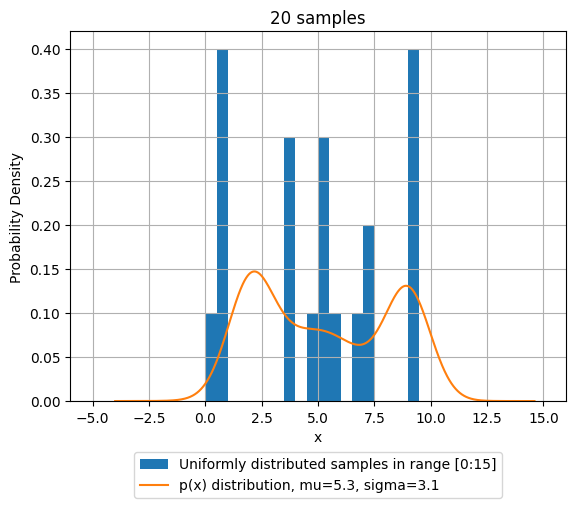

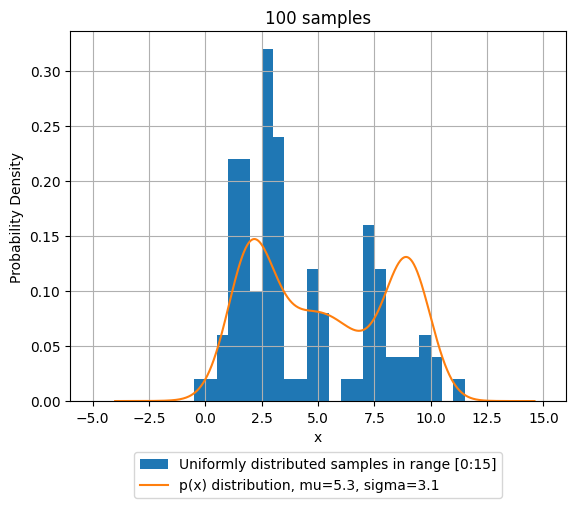

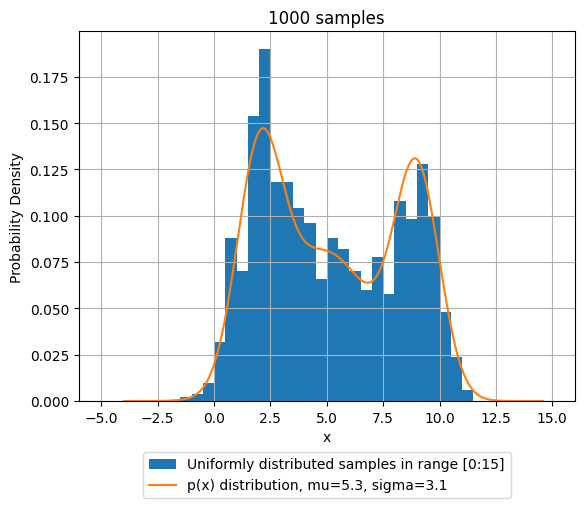

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import random 

for num_samples in (20,100,1000):
    bins = 40
    a = 0
    b = 15
    loc = 5
    scale = 4
    samples = np.random.normal(loc, scale, num_samples)
    w = p(samples)/N(samples, loc, scale)
    pp = random.choices(samples,w, k = num_samples)
    def N(x,mu,sigma):
        return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

    M = [[0.3, 2.0, 1.0], [0.4, 5.0, 2.0], [0.3, 9.0, 1.0]]

    def p(x):
        return sum(list(map(lambda m: m[0]*N(x,m[1],m[2]),M)))

    mu = 0.3*2 + 0.4*5 + 0.3*9
    sigma = np.sqrt(sum(list(map(lambda m: m[0] * (m[2]**2 + (m[1] - mu)**2),M))))
    #Generate x values from -3σ to +3σ
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

    #Plot the normal distribution
    plt.hist(pp,bins,(-5,15), density=True, label=f'Uniformly distributed samples in range [{a}:{b}]')
    plt.plot(x, p(x), label=f'p(x) distribution, mu={mu}, sigma={sigma}')
    plt.title(f'{num_samples} samples')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2),
            ncol=1, fancybox=True, shadow=False)
    plt.grid(True)
    plt.show()